<a href="https://colab.research.google.com/github/srilatha4567/aiml_task6/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non

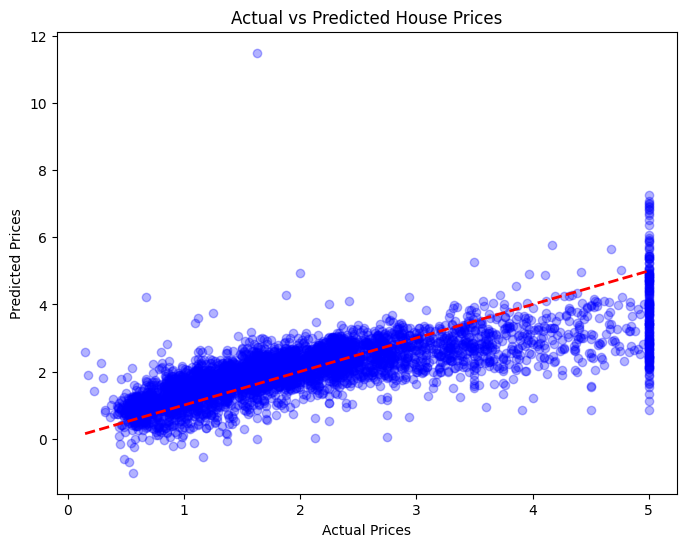


Feature Impact (Coefficients):
             Coefficient
AveBedrms      0.783145
MedInc         0.448675
HouseAge       0.009724
Population    -0.000002
AveOccup      -0.003526
AveRooms      -0.123323
Latitude      -0.419792
Longitude     -0.433708


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load the California housing dataset (Hint #1)
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# 2. Basic Inspection (Hint #2)
print("Dataset Head:\n", df.head())
print("\nDataset Info:"); df.info()
print("\nDescriptive Stats:\n", df.describe())

# 3. Separate Features and Target (Hint #3)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# 4. Train-Test Split (Hint #4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Linear Regression Model (Hint #5)
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict and Comparison Table (Hint #6)
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)
print("\nActual vs Predicted Comparison:\n", comparison_df)

# 7. Evaluate the Model (Hint #7)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 8. Plot Predicted vs Actual (Hint #8)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 9. Interpret Coefficients (Hint #9)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Impact (Coefficients):\n", coefficients.sort_values(by='Coefficient', ascending=False))

1. Data Preparation & InspectionDataset: Utilized the California Housing dataset, converted into a Pandas DataFrame for structured analysis.Inspection: Performed basic data profiling using .head(), .info(), and .describe() to understand feature distributions and verify that the target variable (MedHouseVal) is continuous.
2. Model Training & EvaluationWorkflow: Split the data into training and testing sets using train_test_split with a fixed random_state to ensure results are reproducible.Implementation: Trained a Linear Regression model to find the line of best fit between housing features and market value.Error Metrics: Evaluated performance using MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) to quantify the average prediction deviation in real-world currency units.
3. Visual Analysis & InterpretationPrediction Quality: Generated a scatter plot of Actual vs. Predicted values. A tight grouping around the $45^{\circ}$ diagonal line confirms high model accuracy.Feature Impact: Interpreted model coefficients to identify which variables (e.g., median income or location) have the strongest positive or negative influence on house prices.